In [5]:
import numpy as np
import yaml
import os
import shutil
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt

# 目标时间步数
lists = [0,1,100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 50000, 80000, 100000] #5000, 10000, 500000

# 读取初始参数
with open('/home/wsy/Acc_MC/MC_sim/paras.yaml', 'r') as f:
    config = yaml.safe_load(f)
R_sh = float(config['R_sh'])
GM0 = float(config['GM0'])
eta = float(config['eta'])
beta_min = float(config['beta_min'])
B0 = float(config['B0'])
xi = float(config['xi'])
Lam_max = float(config['Lam_max'])
g_me0 = float(config['g_me0']) 
r0 = float(config['r0'])
n_p = float(config['n_p'])
mode = float(config['mode'])

N_par = int(config['N_par']) # 粒子数
N_time = int(float((config['N_time']))) # 时间步数
N_bins = config['N_bins'] # 时间步长

jet_type = config['type']
syn = config['SYN_flag']
SA = config['SA_flag']
Sh = config['Shear_flag']
ESC = config['ESC_flag']

lgRsh = float(np.log10(R_sh))
lgLam = float(np.log10(Lam_max))
lgr0 = float(np.log10(r0))

config = {
    'log R_sh': lgRsh,
    'GM0': GM0,
    'eta': eta,
    'B0': B0,
    'xi': xi,
    'log Lam_max': lgLam,
    'gme0': g_me0,
    'number density for protons': n_p,
    'log r0': lgr0,
    'Type': jet_type,
    'Particle numbers': N_par,
    'Step numbers': N_time,
    'Step length': N_bins,
    'Whether esc': ESC,
    'SYN': syn,
    'SA': SA,
    'Sh': Sh
}


if jet_type=='kolgv': 
    q = 5/3
elif jet_type=='Bohm':
    q = 1
elif jet_type=='HS':
    q = 2

if mode == 3:
    output_dir = '/home/wsy/Acc_MC/Results/trial_Cinjection_Drag/'
else:
    output_dir = '/home/wsy/Acc_MC/Results/trial_Cinjection_RW/'
    
type = 'Cinject'
acc_type = 'All'

if (SA == True) and (Sh == False):
    acc_type = 'SAOnly'
elif (SA == False) and (Sh == True):
    acc_type = 'ShOnly'
    
name = type + '_' + acc_type + '_' + jet_type
# 保存配置文件
run_id = '%s_%s_%s_%s_%s'%(lgRsh, GM0, B0, xi, n_p)
tar_dir = f'/home/wsy/Acc_MC/figures/{run_id}_{name}/'

if os.path.exists(tar_dir):
    shutil.rmtree(tar_dir)   # 删除已有的文件夹
os.makedirs(tar_dir)
    
with open(os.path.join(tar_dir, 'config_record.yaml'), 'w') as f:
    yaml.dump(config, f)

file1 = np.load(output_dir + 'gme_jetL.npy')
file2 = np.load(output_dir +'r_jetL.npy')
file3 = np.load(output_dir +'t_jetL.npy')
file4 = np.load(output_dir +'x_jetL.npy')
file5 = np.load(output_dir +'y_jetL.npy')
file6 = np.load(output_dir +'z_jetL.npy')

non_nan_count = np.count_nonzero(~np.isnan(file1[:,0]))
print(non_nan_count)
if np.isnan(file1[:,-1].any()):
    print('逃逸发生')
else:
    print('没有逃逸')
    ESC = False

1
没有逃逸


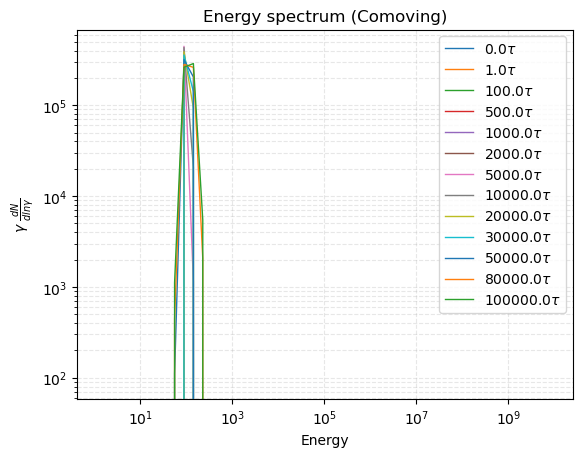

In [6]:
for i in lists:
    g_me = file1[:,i]
    g_me = g_me[g_me != float(np.nan)]
    bins = np.logspace(np.min(np.log10(1e0)), np.max(np.log10(1e10)), 50) # 在对数空间上统计
    counts, bin_edges = np.histogram(g_me, bins=bins) 
    N_tau = i/N_bins
    # 计算每个区间的中心点（用于绘图）
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, bin_centers*counts, markersize=4, linewidth=1, label=r'%s$\tau$ '%N_tau)
plt.title('Energy spectrum (Comoving)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy')
plt.ylabel(r'$\gamma$ $\frac{dN}{dln \gamma}$')
#plt.title('Log-Log Energy Spectrum of 1000 Particles')
#plt.ylim(1e1,1e8)
#plt.xlim(1e0,1e6)
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.legend()
plt.savefig(tar_dir + 'spec_comv.png')
plt.show()